In [58]:
import imageio
import imgaug as ia
import os, glob
import re
import numpy as np
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from numpy import asarray
from matplotlib import image

In [59]:
def load_image_dataset(image_path, rescale, target_size):
    images = []
    target_size = target_size
    count = 0
    
    for img in os.listdir(image_path):
            count += 1
            img = os.path.join(image_path, img)
            img = PIL.Image.open(img)
            img = asarray(img)
            img = np.expand_dims(img, axis=0)
            processed_image = np.array(img, dtype="float")
            if (rescale == True):
                processed_image = processed_image / 255.0
                images.append(processed_image)
                
            else:
                images.append(processed_image)
            
    images = np.vstack(images)
    #print(count)
    print("Quantidade de Imagens Processadas : ", len(images), "\n")
    return images

Quantidade de Imagens Processadas :  264 

264


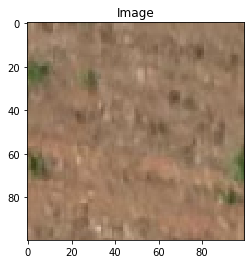

In [92]:
array_images_validation = []
array_images_train = []

array_images_validation = load_image_dataset(
                    image_path='../../sensix_daninhas/dataset_redimensionated/validation',
                    rescale=True,
                    target_size = (100,100, 1))

#array_images_train = load_image_dataset(
#                    image_path='../../sensix_daninhas/dataset_redimensionated/',
#                    rescale=True,
#                    target_size = (100,100, 1))

#print(array_images)

print(len(array_images_validation))
#print(len(array_images_train))


show_one_image(array_images_validation[263])

In [106]:
for i in range(10):
    show_one_image(array_images[i], image_title = i)

In [128]:
def show_one_image(number_array, image_path = '.', image_title = "Image", by_name = False):
    if (by_name == False):        
        plt.imshow(number_array)
        plt.title(image_title)
        plt.axis()
        plt.show()

    elif (by_name == True):
        image = PIL.Image.open(image_path)
        # metodo asrray que realiza a conversao
        #plt.imshow(image)
        array = asarray(image)
        plt.imshow(array)
        plt.title(image_title)
        plt.axis()
        plt.show()

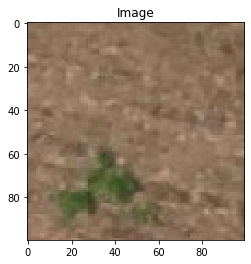

In [118]:
path_test = '../../sensix_daninhas/dataset_redimensionated/validation/daninha_21.jpg'
show_one_image(0, by_name = True, image_path = path_test)

In [119]:
def mirror_horizontal(array_images):
    img_hor = []
    
    for i in range(len(array_images)):
        #show_one_image(array_images[i])
        #img = np.expand_dims(array_images[i], axis=0)
        img = np.fliplr(array_images[i])
        processed_image = np.array(img, dtype="float")
        img_hor.append(processed_image)
        
    #print(img_hor)
    return (img_hor)

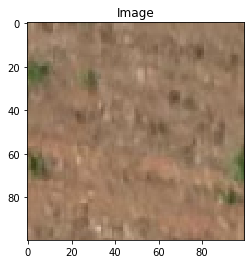

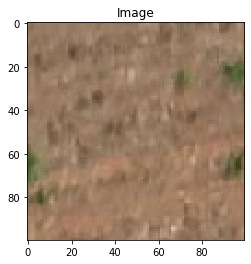

In [120]:
teste = mirror_horizontal(array_images_validation)
#print(len(teste))
show_one_image(array_images_validation[263])
show_one_image(teste[263])

In [121]:
def mirror_vertical(array_images):
    img_ver = []
    
    for i in range(len(array_images)):
        #show_one_image(array_images[i])
        #img = np.expand_dims(array_images[i], axis=0)
        img = np.flipud(array_images[i])
        processed_image = np.array(img, dtype="float")
        img_ver.append(processed_image)
        
    return (img_ver)

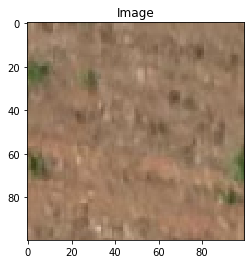

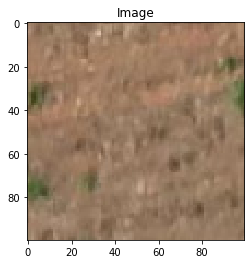

In [122]:
teste_v = mirror_vertical(array_images_validation)
show_one_image(array_images_validation[263])
show_one_image(teste_v[263])

In [123]:
def rotate_image(array_images, img_genereted=6):
    img_rot = []
    if(img_genereted == 0):
        img_genereted = 1
        
    theta = 360 / img_genereted
    theta =  int(theta)

    #for i in range(len(array_images)):
    for i in range(2):
        for ctheta in range(0, 360, theta):
            rotate = iaa.Affine(rotate=(ctheta))
            img = rotate(image=array_images[i])
            processed_image = np.array(img, dtype="float")
            img_rot.append(processed_image)
            show_one_image(img, image_title = i)
    return (img_rot)

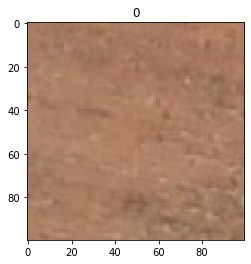

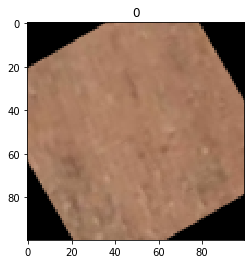

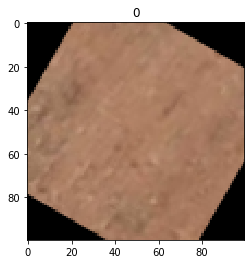

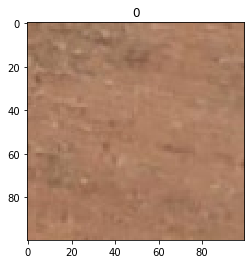

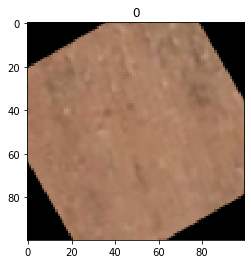

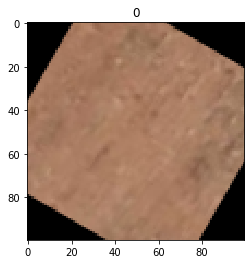

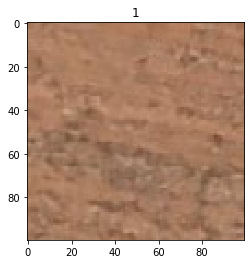

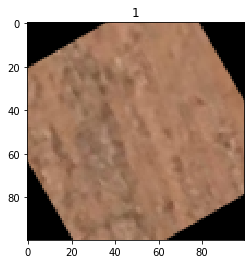

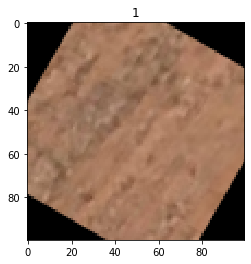

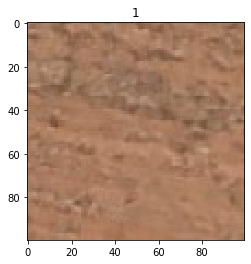

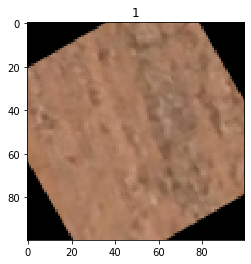

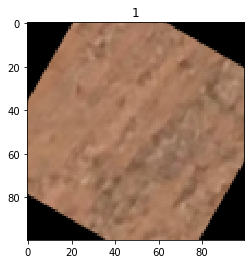

numero de Imagens Geradas :  12


In [124]:
teste_rot = rotate_image(array_images_validation, img_genereted=6)
print("numero de Imagens Geradas : ", len(teste_rot))
#show_one_image(array_images_validation[263])
#show_one_image(teste_rot[263])

In [200]:
def saturate_img(array_images):      
    img_sat = []
    saturation = iaa.AddToHueAndSaturation((-50,50))

    for i in range(len(array_images)):
    #for i in range(2):
        #show_one_image(array_images[i])
        #img = np.expand_dims(array_images[i], axis=0)
        print(array_images[i])
        #processed_image = np.array(img, dtype="float")
        #img_sat.append(processed_image)
        img_sat = saturation(images=array_images[i])
        img_sat.astype('uint8')
        img_augmented = img(array_images[i])
    return (img_augmented)

In [201]:
saturate_img(array_images_validation[0])

[[0.66666667 0.49411765 0.38823529]
 [0.65490196 0.48235294 0.37647059]
 [0.65490196 0.48235294 0.37647059]
 [0.65882353 0.48627451 0.38039216]
 [0.65490196 0.48235294 0.37647059]
 [0.6627451  0.49019608 0.38431373]
 [0.6627451  0.49019608 0.38431373]
 [0.65490196 0.48235294 0.37647059]
 [0.66666667 0.49411765 0.38823529]
 [0.66666667 0.49411765 0.38823529]
 [0.6627451  0.49019608 0.38431373]
 [0.64705882 0.48627451 0.36862745]
 [0.64313725 0.48235294 0.36470588]
 [0.64313725 0.48235294 0.36470588]
 [0.63921569 0.47843137 0.35294118]
 [0.62745098 0.46666667 0.34117647]
 [0.63921569 0.47843137 0.36078431]
 [0.63529412 0.4745098  0.35686275]
 [0.63921569 0.47843137 0.36078431]
 [0.64705882 0.48627451 0.36862745]
 [0.63529412 0.4745098  0.35686275]
 [0.63921569 0.47843137 0.36078431]
 [0.65098039 0.49019608 0.37254902]
 [0.65098039 0.49019608 0.37254902]
 [0.70980392 0.53333333 0.41176471]
 [0.69019608 0.51372549 0.39215686]
 [0.6745098  0.49803922 0.37647059]
 [0.65490196 0.47843137 0.35

ValueError: Got dtype 'float64', which is a forbidden dtype (bool, uint16, int8, int16, uint32, int64, float16, float32, int32, uint64, float64, float128).